In [2]:
# Download the zip file
!wget https://confrecordings.ams3.cdn.digitaloceanspaces.com/Internship/Indian.zip

# Unzip the downloaded file
!unzip Indian.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian/V/822.jpg        
  inflating: Indian/V/823.jpg        
  inflating: Indian/V/824.jpg        
  inflating: Indian/V/825.jpg        
  inflating: Indian/V/826.jpg        
  inflating: Indian/V/827.jpg        
  inflating: Indian/V/828.jpg        
  inflating: Indian/V/829.jpg        
  inflating: Indian/V/83.jpg         
  inflating: Indian/V/830.jpg        
  inflating: Indian/V/831.jpg        
  inflating: Indian/V/832.jpg        
  inflating: Indian/V/833.jpg        
  inflating: Indian/V/834.jpg        
  inflating: Indian/V/835.jpg        
  inflating: Indian/V/836.jpg        
  inflating: Indian/V/837.jpg        
  inflating: Indian/V/838.jpg        
  inflating: Indian/V/839.jpg        
  inflating: Indian/V/84.jpg         
  inflating: Indian/V/840.jpg        
  inflating: Indian/V/841.jpg        
  inflating: Indian/V/842.jpg        
  inflating: Indian/V/843.jpg        
  inflating: Indian/V/844.jpg        

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [4]:
train_folder = '/content/Indian/'
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [5]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [6]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

In [7]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [8]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [9]:
classes = 35
epochs = 3
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)


Epoch 1/3
1203/1203 [==============================] - 292s 240ms/step - loss: 0.1293 - accuracy: 0.9663 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 2/3
1203/1203 [==============================] - 280s 233ms/step - loss: 1.6222e-04 - accuracy: 0.9999 - val_loss: 9.8913e-05 - val_accuracy: 1.0000
Epoch 3/3
1203/1203 [==============================] - 288s 239ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 8.8166e-04 - val_accuracy: 1.0000


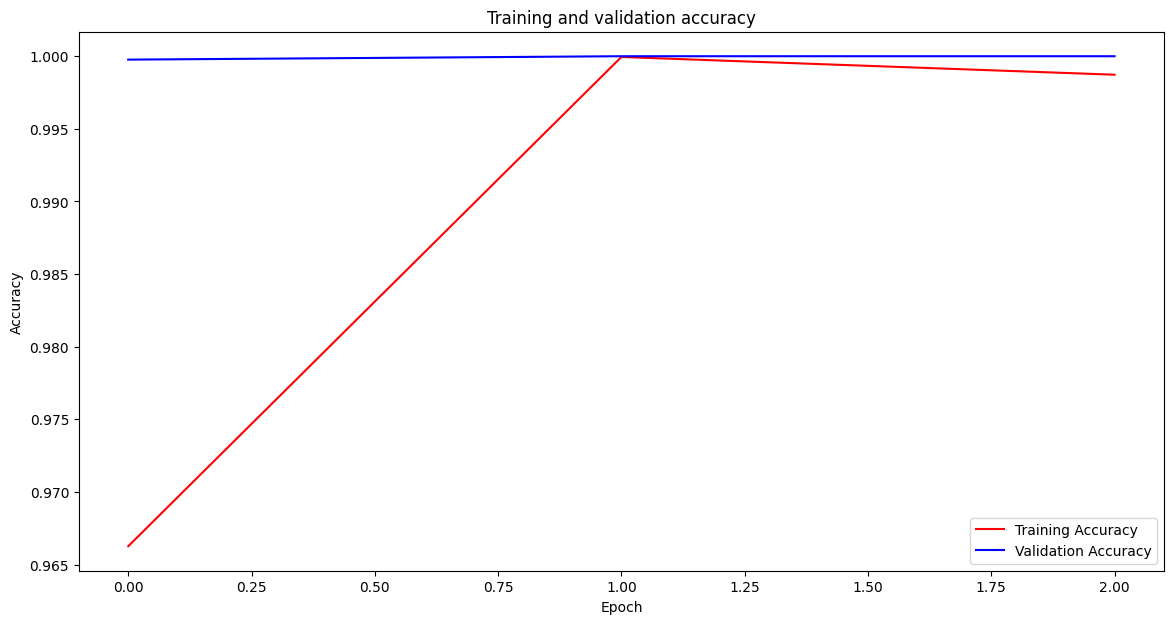

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

(128, 128)
(64, 64)
1/1 [==============================] - 0s 135ms/step
4


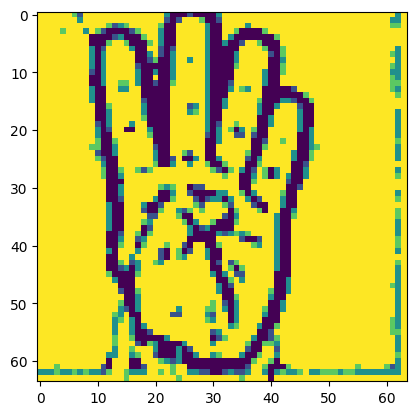

In [11]:
class_labels = list(map_characters.values())
filename='Indian/4/1.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

p = img.reshape(1, 64, 64, 1)

predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)

# Sign Language Prediction

## Please upload the hand sign image using the upload button

FileUpload(value={}, description='Upload Image')

## Please click on the submit button

Button(description='Submit', style=ButtonStyle())

Output()

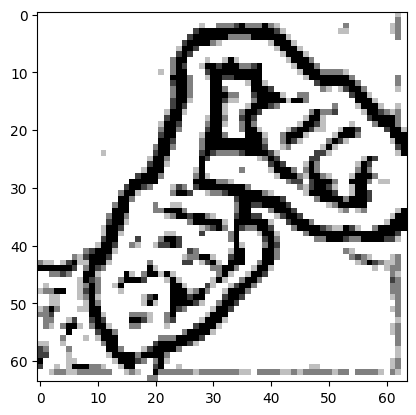

In [17]:
import ipywidgets as widgets
from IPython.display import display, Markdown
import io
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create UI elements
project_name = Markdown('# Sign Language Prediction')
up_btn = Markdown('## Please upload the hand sign image using the upload button')
upload_button = widgets.FileUpload(description='Upload Image')
cl_btn = Markdown('## Please click on the submit button')
submit_button = widgets.Button(description='Submit')
output = widgets.Output()

# Define submit button click event handler
def on_submit_button_click(button):
  with output:
    if upload_button.value:
      # Check if any files were uploaded
      uploaded_files = list(upload_button.value.values())
      if uploaded_files:
        # Read the first uploaded image
        image_bytes = uploaded_files[0]['content']
        image = Image.open(io.BytesIO(image_bytes))
        img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
        img = edge_detection(img)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        plt.imshow(img, cmap='gray')
        p = img.reshape(1, 64, 64, 1)
        predicted_label = class_labels[model.predict(p).argmax()] # Replace with your class_labels
        print('Predicted label:', predicted_label)
        if predicted_label=='1':
          print('This is Number One.')
        elif predicted_label=='2':
          print('This is Number Two.')
        elif predicted_label=='3':
          print('This is Number Three.')
        elif predicted_label=='4':
          print('This is Number Four.')
        elif predicted_label=='5':
          print('This is Number Five.')
        elif predicted_label=='6':
          print('This is Number Six.')
        elif predicted_label=='7':
          print('This is Number Seven.')
        elif predicted_label=='8':
          print('This is Number Eight.')
        elif predicted_label=='9':
          print('This is Number Nine.')
        elif predicted_label=='A':
          print('This is Letter A.')
        elif predicted_label=='B':
          print('This is Letter B.')
        elif predicted_label=='C':
          print('This is Letter C.')
        elif predicted_label=='D':
          print('This is Letter D.')
        elif predicted_label=='E':
          print('This is Letter E.')
        elif predicted_label=='F':
          print('This is Letter F.')
        elif predicted_label=='G':
          print('This is Letter G.')
        elif predicted_label=='H':
          print('This is Letter H.')
        elif predicted_label=='I':
          print('This is Letter I.')
        elif predicted_label=='J':
          print('This is Letter J.')
        elif predicted_label=='K':
          print('This is Letter K.')
        elif predicted_label=='L':
          print('This is Letter L.')
        elif predicted_label=='M':
          print('This is Letter M.')
        elif predicted_label=='N':
          print('This is Letter N.')
        elif predicted_label=='O':
          print('This is Letter O.')
        elif predicted_label=='P':
          print('This is Letter P.')
        elif predicted_label=='Q':
          print('This is Letter Q.')
        elif predicted_label=='R':
          print('This is Letter R.')
        elif predicted_label=='S':
          print('This is Letter S.')
        elif predicted_label=='T':
          print('This is Letter T.')
        elif predicted_label=='U':
          print('This is Letter U.')
        elif predicted_label=='V':
          print('This is Letter V.')
        elif predicted_label=='W':
          print('This is Letter W.')
        elif predicted_label=='X':
          print('This is Letter X.')
        elif predicted_label=='Y':
          print('This is Letter Y.')
        elif predicted_label=='Z':
          print('This is Letter Z.')
        else:
          print('Sign Not Detected')

# Assign event handler to the submit button
submit_button.on_click(on_submit_button_click)

# Display UI elements
display(project_name)
display(up_btn)
display(upload_button)
display(cl_btn)
display(submit_button)
display(output)